In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

## Generating data 

Number of positive examples
(1000, 3)
Number of negative examples
(1073, 3)


/Users/lauragraesser/anaconda3/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


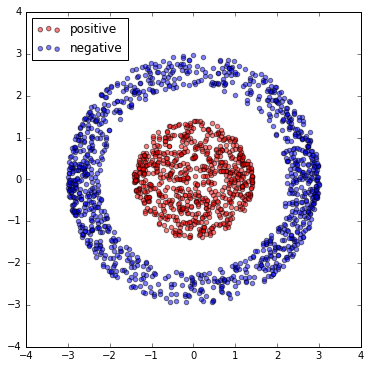

In [9]:
#Creating two balls with different circumferences
N = 1000
x = np.random.rand(N) * 4 - 2
y = np.multiply(np.sqrt(2 - np.power(x,2)),(np.random.rand(N) * 2 - 1))

x2 = np.random.rand(2*N) * 6 - 3
y2 = np.multiply(np.sqrt(9 - np.power(x2,2)),(np.random.rand(2*N) * 2 - 1))

positives = np.zeros((1000,3))
positives[:,0] = x
positives[:,1] = y
positives[:,2] = 1

negatives = np.zeros((2000,3))
negatives[:,0] = x2
negatives[:,1] = y2
negatives[:,2] = 0

#Hollowing out larger ball
newnegatives = negatives[(np.power(negatives[:,0],2) + np.power(negatives[:,1],2)) > 5]
#Checking number of negatives and positives are roughly equal
print('Number of positive examples')
print(positives.shape)
print('Number of negative examples')
print(newnegatives.shape)

#Plotting the figure
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)

ax1.scatter(positives[:,0], positives[:,1], s=20, alpha=0.5, c='r', marker="o", label='positive')
ax1.scatter(newnegatives[:,0], newnegatives[:,1], s=20, alpha=0.5, c='b', marker="o", label='negative')
plt.legend(loc='upper left')

plt.show()

#Merging examples into one dataset
data = np.concatenate((positives, newnegatives))
data.shape

#Saving the whole dataset
pickle.dump(data, open("nn_dataset_1.pkl", "wb"))

## Shuffling data and getting rid of nans

In [10]:
print("Data shape: " + str(data.shape))
np.random.shuffle(data)
data = np.nan_to_num(data)
data = data[data[:,1]!=0]
print("Data shape: " + str(data.shape))

Data shape: (2073, 3)
Data shape: (1772, 3)


## Feature scaling: X = (x - xmin) / (xmax - xmin)

In [11]:
max_vals = np.argmax(data, axis=0)
max_x1 = data[max_vals[0],0]
max_x2 = data[max_vals[1],1]
print(max_x1)
print(max_x2)
min_vals = np.argmin(data, axis=0)
min_x1 = data[min_vals[0],0]
min_x2 = data[min_vals[1],1]
print(min_x1)
print(min_x2)
data[:,0] = (data[:,0] - min_x1) / (max_x1 - min_x1)
data[:,1] = (data[:,1] - min_x2) / (max_x2 - min_x2)
max_vals = np.argmax(data, axis=0)
print(data[max_vals])

2.99467711985
2.96167251755
-2.99188784231
-2.92874093092
[[ 1.          0.47619297  0.        ]
 [ 0.4987751   1.          0.        ]
 [ 0.5978306   0.43853028  1.        ]]


## Creating training and test datasets

In [12]:
train_data = data[:1400,:]
train_x = train_data[:,:-1]
train_y = train_data[:,-1]
train_y = np.reshape(train_y,(train_y.shape[0],1))
test_data = data[1400:,:]
test_x = test_data[:,:-1]
test_y = test_data[:,-1]
test_y = np.reshape(test_y,(test_y.shape[0],1))
print("Train_x shape: " + str(train_x.shape))
print("Train_y shape: " + str(train_y.shape))
print("Test shape: " + str(test_x.shape))
print("Test_y shape: " + str(test_y.shape))
positives = train_data[train_data[:,2]==1]
negatives = train_data[train_data[:,2]==0]
positives2 = test_data[test_data[:,2]==1]
negatives2 = test_data[test_data[:,2]==0]

Train_x shape: (1400, 2)
Train_y shape: (1400, 1)
Test shape: (372, 2)
Test_y shape: (372, 1)


## Plotting training and validation datasets

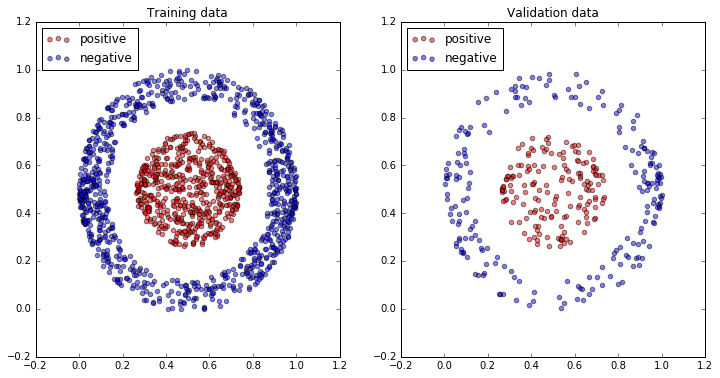

In [14]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(positives[:,0], positives[:,1], s=20, alpha=0.5, c='r', marker="o", label='positive')
ax1.scatter(negatives[:,0], negatives[:,1], s=20, alpha=0.5, c='b', marker="o", label='negative')
ax2.scatter(positives2[:,0], positives2[:,1], s=20, alpha=0.5, c='r', marker="o", label='positive')
ax2.scatter(negatives2[:,0], negatives2[:,1], s=20, alpha=0.5, c='b', marker="o", label='negative')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.set_title("Training data")
ax2.set_title("Validation data")
plt.savefig('DonutBallDataset.png', dpi=200)
plt.show()

## Saving training and test data

In [15]:
pickle.dump(train_data, open("nn_donutballdata_train_data.pkl", "wb"))
pickle.dump(train_x, open("nn_donutballdata_train_x.pkl", "wb"))
pickle.dump(train_y, open("nn_donutballdata_train_y.pkl", "wb"))
pickle.dump(test_data, open("nn_donutballdata_test_data.pkl", "wb"))
pickle.dump(test_x, open("nn_donutballdata_test_x.pkl", "wb"))
pickle.dump(test_y, open("nn_donutballdata_test_y.pkl", "wb"))